In [1]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "1.8.0_121"; OpenJDK Runtime Environment (Zulu 8.20.0.5-linux64) (build 1.8.0_121-b15); OpenJDK 64-Bit Server VM (Zulu 8.20.0.5-linux64) (build 25.121-b15, mixed mode)
  Starting server from /home/ankish/anaconda3/h2o_jar/h2o.jar
  Ice root: /tmp/tmpxdvs8vjw
  JVM stdout: /tmp/tmpxdvs8vjw/h2o_ankish_started_from_python.out
  JVM stderr: /tmp/tmpxdvs8vjw/h2o_ankish_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,03 secs
H2O cluster timezone:,Asia/Kolkata
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.2
H2O cluster version age:,"1 year, 1 month and 12 days !!!"
H2O cluster name:,H2O_from_python_ankish_0qcta1
H2O cluster total nodes:,1
H2O cluster free memory:,2.590 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


In [ ]:
train_df = pd.read_csv('store_data/train_df_save4.csv')
test_df  = pd.read_csv('store_data/test_df_save4.csv')

In [ ]:
hf = h2o.H2OFrame(df)

In [4]:
# Import a sample binary outcome train/test set into H2O
train = h2o.import_file("train_aox2Jxw/train.csv")
test = h2o.import_file("test_bqCt9Pv.csv")

# Identify predictors and response
x = train.columns
y = "loan_default"
x.remove(y)

# For binary classification, response should be a factor
train[y] = train[y].asfactor()
# test[y] = test[y].asfactor()

# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=5, seed=1, max_runtime_secs=300, nfolds=0)
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


model_id,auc,logloss
GBM_grid_0_AutoML_20190417_213607_model_0,0.644573,0.499749
XRT_0_AutoML_20190417_213607,0.643521,0.499639
GBM_grid_0_AutoML_20190417_213607_model_1,0.642036,0.500505
GLM_grid_0_AutoML_20190417_213607_model_0,0.639736,0.500754
DRF_0_AutoML_20190417_213607,0.635322,0.504474


In [6]:
# Import a sample binary outcome train/test set into H2O
train = h2o.import_file("store_data/train_df_save4.csv")
# test = h2o.import_file("store_data/test_df_save4.csv")

# Identify predictors and response
x = train.columns
y = "loan_default"
x.remove(y)

# For binary classification, response should be a factor
train[y] = train[y].asfactor()
# test[y] = test[y].asfactor()

# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml1 = H2OAutoML(max_models=5, seed=1, max_runtime_secs=600, nfolds=0)
aml1.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml1.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)


Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


model_id,auc,logloss
GBM_grid_0_AutoML_20190417_214407_model_1,0.672536,0.496521
GBM_grid_0_AutoML_20190417_214407_model_0,0.671975,0.496897
GLM_grid_0_AutoML_20190417_214407_model_0,0.658491,0.503766
DRF_0_AutoML_20190417_214407,0.649343,0.504771
XRT_0_AutoML_20190417_214407,0.645618,0.506174


In [7]:
import pandas as pd
test_pd = pd.read_csv('store_data/test_df_save4.csv')#, usecols=['UniqueID'])
sub = pd.DataFrame()
sub['UniqueID'] = test_pd.UniqueID

test = h2o.H2OFrame(test_pd)
pred = aml1.predict(test)

pred = pred.as_data_frame()
sub['loan_default'] = pred.p1
# sub.columns = sub.columns
sub.to_csv('submission/gbm_wed1.csv', index=None)
sub.head()

/home/ankish/anaconda3/lib/python3.6/site-packages/h2o/utils/shared_utils.py:170: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  data = _handle_python_lists(python_obj.as_matrix().tolist(), -1)[1]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%


,UniqueID,loan_default
0,655269,0.452935
1,723482,0.495612
2,758529,0.516179
3,763449,0.498542
4,708663,0.447370


In [8]:
sub.to_csv('submission/gbm_wed1.csv',index=None)


In [ ]:
# Import a sample binary outcome train/test set into H2O
train = h2o.import_file("store_data/train_df_save4.csv")
# test = h2o.import_file("store_data/test_df_save4.csv")

# Identify predictors and response
x = train.columns
y = "loan_default"
x.remove(y)

# For binary classification, response should be a factor
train[y] = train[y].asfactor()
# test[y] = test[y].asfactor()

# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml1 = H2OAutoML(max_models=5, seed=1, max_runtime_secs=600, nfolds=0)
aml1.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml1.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)


In [4]:
# import pandas as pd
# tr = pd.read_csv('train_aox2Jxw/train.csv')


In [5]:
# train[y] = train[y].asfactor()
# train

UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,DisbursalDate,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE,PERFORM_CNS.SCORE.DESCRIPTION,PRI.NO.OF.ACCTS,PRI.ACTIVE.ACCTS,PRI.OVERDUE.ACCTS,PRI.CURRENT.BALANCE,PRI.SANCTIONED.AMOUNT,PRI.DISBURSED.AMOUNT,SEC.NO.OF.ACCTS,SEC.ACTIVE.ACCTS,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
420825,50578,58400,89.55,67,22807,45,1441,1984-01-01 00:00:00,Salaried,03-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
537409,47145,65550,73.23,67,22807,45,1502,,Self employed,26-09-18,6,1998,1,1,0,0,0,0,598,I-Medium Risk,1,1,1,27600,50200,50200,0,0,0,0,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
417566,53278,61360,89.63,67,22807,45,1497,,Self employed,01-08-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
624493,57513,66113,88.48,67,22807,45,1501,,Self employed,26-10-18,6,1998,1,1,0,0,0,0,305,L-Very High Risk,3,0,0,0,0,0,0,0,0,0,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
539055,52378,60300,88.39,67,22807,45,1495,1977-09-12 00:00:00,Self employed,26-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1
518279,54513,61900,89.66,67,22807,45,1501,1990-08-09 00:00:00,Self employed,19-09-18,6,1998,1,1,0,0,0,0,825,A-Very Low Risk,2,0,0,0,0,0,0,0,0,0,0,0,1347,0,0,0,1yrs 9mon,2yrs 0mon,0,0
529269,46349,61500,76.42,67,22807,45,1502,1988-01-06 00:00:00,Salaried,23-09-18,6,1998,1,1,0,0,0,0,0,No Bureau History Available,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
510278,43894,61900,71.89,67,22807,45,1501,1989-04-10 00:00:00,Salaried,16-09-18,6,1998,1,1,0,0,0,0,17,Not Scored: Not Enough Info available on the customer,1,1,0,72879,74500,74500,0,0,0,0,0,0,0,0,0,0,0yrs 2mon,0yrs 2mon,0,0
490213,53713,61973,89.56,67,22807,45,1497,,Self employed,05-09-18,6,1998,1,1,0,0,0,0,718,D-Very Low Risk,1,1,0,-41,365384,365384,0,0,0,0,0,0,0,0,0,0,4yrs 8mon,4yrs 8mon,1,0
510980,52603,61300,86.95,67,22807,45,1492,2068-01-06 00:00:00,Salaried,16-09-18,6,1998,1,0,0,1,0,0,818,A-Very Low Risk,1,0,0,0,0,0,0,0,0,0,0,0,2608,0,0,0,1yrs 7mon,1yrs 7mon,0,0


In [6]:
# Import a sample binary outcome train/test set into H2O
train = h2o.import_file("train_aox2Jxw/train.csv")
test = h2o.import_file("test_bqCt9Pv.csv")

# Identify predictors and response
x = train.columns
y = "loan_default"
x.remove(y)

# For binary classification, response should be a factor
train[y] = train[y].asfactor()
# test[y] = test[y].asfactor()

# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml = H2OAutoML(max_models=2, seed=1, max_runtime_secs=300)
aml.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


model_id,auc,logloss
StackedEnsemble_BestOfFamily_0_AutoML_20190417_121630,0.647097,0.500026
StackedEnsemble_AllModels_0_AutoML_20190417_121630,0.647097,0.500026
XRT_0_AutoML_20190417_121630,0.640294,0.501751
DRF_0_AutoML_20190417_121630,0.634744,0.505718


In [2]:
# Import a sample binary outcome train/test set into H2O
train = h2o.import_file("train_aox2Jxw/train.csv")
# test = h2o.import_file("test_bqCt9Pv.csv")

train = train.drop('UniqueID', axis=1)
# Identify predictors and response
x = train.columns
y = "loan_default"
x.remove(y)

# For binary classification, response should be a factor
train[y] = train[y].asfactor()



Parse progress: |█████████████████████████████████████████████████████████| 100%


In [3]:
# del train
import gc
gc.collect()

62

In [4]:
# Run AutoML for 20 base models (limited to 1 hour max runtime by default)
aml1 = H2OAutoML(max_models=20, seed=1337, max_runtime_secs=14000, nfolds=4)
aml1.train(x=x, y=y, training_frame=train)

# View the AutoML Leaderboard
lb1 = aml1.leaderboard
lb1.head(rows=lb1.nrows)  # Print all rows instead of default (10 rows)


AutoML progress: |████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


model_id,auc,logloss
StackedEnsemble_AllModels_0_AutoML_20190417_123025,0.659059,0.495797
StackedEnsemble_BestOfFamily_0_AutoML_20190417_123025,0.658088,0.496051
GBM_grid_0_AutoML_20190417_123025_model_12,0.656414,0.501299
GBM_grid_0_AutoML_20190417_123025_model_11,0.655463,0.502426
GBM_grid_0_AutoML_20190417_123025_model_15,0.653439,0.49761
GBM_grid_0_AutoML_20190417_123025_model_7,0.651671,0.503661
GBM_grid_0_AutoML_20190417_123025_model_10,0.64296,0.501308
GBM_grid_0_AutoML_20190417_123025_model_6,0.640216,0.50635
GBM_grid_0_AutoML_20190417_123025_model_0,0.640005,0.502206
GLM_grid_0_AutoML_20190417_123025_model_0,0.638835,0.502693


In [9]:
test = h2o.import_file("test_bqCt9Pv.csv")
pred = aml1.predict(test)
pred.head()

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%


/home/ankish/anaconda3/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'DisbursalDate' has levels not trained on: [03-11-18, 05-11-18, 06-11-18, 07-11-18, 08-11-18, 09-11-18, 10-11-18, 11-11-18, 12-11-18, 13-11-18, 14-11-18, 15-11-18, 16-11-18, 17-11-18, 18-11-18, 19-11-18, 20-11-18, 21-11-18, 22-11-18, 23-11-18, 24-11-18, 25-11-18, 26-11-18, 27-11-18, 28-11-18, 29-11-18, 30-11-18]
  warnings.warn(w)
/home/ankish/anaconda3/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'AVERAGE.ACCT.AGE' has levels not trained on: [12yrs 8mon, 13yrs 9mon, 14yrs 4mon, 14yrs 9mon, 15yrs 1mon, 16yrs 2mon, 16yrs 9mon, 25yrs 10mon]
  warnings.warn(w)
/home/ankish/anaconda3/lib/python3.6/site-packages/h2o/job.py:69: UserWarning: Test/Validation dataset column 'CREDIT.HISTORY.LENGTH' has levels not trained on: [18yrs 3mon, 18yrs 9mon, 21yrs 0mon, 21yrs 10mon, 21yrs 7mon, 22yrs 5mon, 22yrs 8mon, 23yrs 5mon, 23yrs 8mon, 25yrs 10mon, 

predict,p0,p1
1,0.751799,0.248201
1,0.767391,0.232609
1,0.782985,0.217015
1,0.76599,0.23401
1,0.715099,0.284901
1,0.657926,0.342074
1,0.635599,0.364401
1,0.770076,0.229924
1,0.735645,0.264355
1,0.733067,0.266933


In [25]:
h2o.export_file(pred, 'submission/stack.csv')

Export File progress: |███████████████████████████████████████████████████| 100%


In [28]:
import pandas as pd

pred1 = pred.as_data_frame()
pred1.iloc[:5]

,predict,p0,p1
0,1,0.751799,0.248201
1,1,0.767391,0.232609
2,1,0.782985,0.217015
3,1,0.765990,0.234010
4,1,0.715099,0.284901


In [37]:
test1 = pd.read_csv('test_bqCt9Pv.csv')
sub.shape, test1.shape

((112392, 2), (112392, 40))

In [47]:
sub1 = pd.DataFrame()
sub1['id'] = test1.UniqueID
sub1['target'] = pred1.p1
sub1.columns = sub.columns
sub1.head()

,UniqueID,loan_default
0,655269,0.248201
1,723482,0.232609
2,758529,0.217015
3,763449,0.234010
4,708663,0.284901


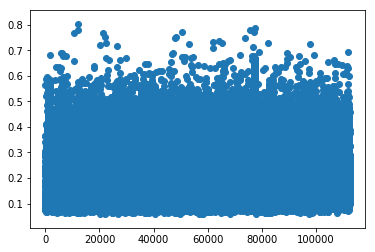

In [46]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.scatter(np.arange(sub1.shape[0]),sub1.loan_default)

In [44]:
sub1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112392 entries, 0 to 112391
Data columns (total 2 columns):
UniqueID        112392 non-null int64
loan_default    112392 non-null float64
dtypes: float64(1), int64(1)
memory usage: 1.7 MB


In [ ]:
sub.loan_default = pred1.p1

In [48]:
sub1.to_csv('submission/stack_wed.csv', index=None)

In [42]:
sub.shape, sub1.shape

((112392, 2), (112392, 2))

In [ ]:
    y_test_pred = fit_model.predict_proba(test_df)[:,1]


    sub_df = pd.DataFrame({"ID_code":test_ids})
    sub_df["target"] = y_test_pred
    sub_df.columns = sub.columns


    sub_df.to_csv('submission/catboost_{}.csv'.format(file_path), index=None)

In [ ]:
# # The leader model is stored here
# aml.leader

# # If you need to generate predictions on a test set, you can make
# # predictions directly on the `"H2OAutoML"` object, or on the leader
# # model object directly

# preds = aml.predict(test)

# # or:
# preds = aml.leader.predict(test)

In [ ]:
# import h2o
# from h2o.automl import H2OAutoML

# h2o.init()

# # Import a sample binary outcome train/test set into H2O
# train = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_train_10k.csv")
# test = h2o.import_file("https://s3.amazonaws.com/erin-data/higgs/higgs_test_5k.csv")

# # Identify predictors and response
# x = train.columns
# y = "response"
# x.remove(y)

# # For binary classification, response should be a factor
# train[y] = train[y].asfactor()
# test[y] = test[y].asfactor()

# # Run AutoML for 20 base models (limited to 1 hour max runtime by default)
# aml = H2OAutoML(max_models=20, seed=1)
# aml.train(x=x, y=y, training_frame=train)

# # View the AutoML Leaderboard
# lb = aml.leaderboard
# lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

# # model_id                                                  auc    logloss    mean_per_class_error      rmse       mse
# # ---------------------------------------------------  --------  ---------  ----------------------  --------  --------
# # StackedEnsemble_AllModels_AutoML_20181212_105540     0.789801   0.551109                0.333174  0.43211   0.186719
# # StackedEnsemble_BestOfFamily_AutoML_20181212_105540  0.788425   0.552145                0.323192  0.432625  0.187165
# # XGBoost_1_AutoML_20181212_105540                     0.784651   0.55753                 0.325471  0.434949  0.189181
# # XGBoost_grid_1_AutoML_20181212_105540_model_4        0.783523   0.557854                0.318819  0.435249  0.189441
# # XGBoost_grid_1_AutoML_20181212_105540_model_3        0.783004   0.559613                0.325081  0.435708  0.189841
# # XGBoost_2_AutoML_20181212_105540                     0.78136    0.55888                 0.347074  0.435907  0.190015
# # XGBoost_3_AutoML_20181212_105540                     0.780847   0.559589                0.330739  0.43613   0.190209
# # GBM_5_AutoML_20181212_105540                         0.780837   0.559903                0.340848  0.436191  0.190263
# # GBM_2_AutoML_20181212_105540                         0.780036   0.559806                0.339926  0.436415  0.190458
# # GBM_1_AutoML_20181212_105540                         0.779827   0.560857                0.335096  0.436616  0.190633
# # GBM_3_AutoML_20181212_105540                         0.778669   0.56179                 0.325538  0.437189  0.191134
# # XGBoost_grid_1_AutoML_20181212_105540_model_2        0.774411   0.575017                0.322811  0.4427    0.195984
# # GBM_4_AutoML_20181212_105540                         0.771426   0.569712                0.33742   0.44107   0.194543
# # GBM_grid_1_AutoML_20181212_105540_model_1            0.769752   0.572583                0.344331  0.442452  0.195764
# # GBM_grid_1_AutoML_20181212_105540_model_2            0.754366   0.918567                0.355855  0.496638  0.246649
# # DRF_1_AutoML_20181212_105540                         0.742892   0.595883                0.355403  0.452774  0.205004
# # XRT_1_AutoML_20181212_105540                         0.742091   0.599346                0.356583  0.453117  0.205315
# # DeepLearning_grid_1_AutoML_20181212_105540_model_2   0.741795   0.601497                0.368291  0.454904  0.206937
# # XGBoost_grid_1_AutoML_20181212_105540_model_1        0.693554   0.620702                0.40588   0.465791  0.216961
# # DeepLearning_1_AutoML_20181212_105540                0.69137    0.637954                0.409351  0.47178   0.222576
# # DeepLearning_grid_1_AutoML_20181212_105540_model_1   0.690084   0.661794                0.418469  0.476635  0.227181
# # GLM_grid_1_AutoML_20181212_105540_model_1            0.682648   0.63852                 0.397234  0.472683  0.223429
# #
# # [22 rows x 6 columns]


# # The leader model is stored here
# aml.leader

# # If you need to generate predictions on a test set, you can make
# # predictions directly on the `"H2OAutoML"` object, or on the leader
# # model object directly

# preds = aml.predict(test)

# # or:
# preds = aml.leader.predict(test)